# Natural Language Processing: NLP

**Bag of Words:** vector representation of a word counts of a document
**Cosine Similarity:**
$$sim(A,B) = cos(\theta) = \frac{A \cdot B}{||A||||B||}$$

Where A and B are the vectors of words:
<ul>
    <li> B = "Blue House" == (red,blue,house) == [0,1,1]</li>
    <li> A = "Red House" == (red,blue,house) == [1,0,1]</li>
</ul>

### Improving on Bag of Words

Adjust word counts based on their frequency in the corpus
* Corpus: group of all sets in the population containing the word (the documents being observed, literally translated as "body" from greek)

#### TF-IDF (Term Frequency - Inverse Document Frequency)

**Term Frequency:** Importance of the term within a document
* TF(d,t) = number occurence of term $t$ in document $d$
**Inverse Document Frequency** Importance of the term in the corpus
$$IDF(t) = log\frac{D}{t}$$
Where
* **D = number of documents**
* **t= number of documents with the term**

**Mathematical Representation of TF-IDF**
$$W_{x,y} = tf_{x,y} \times log\frac{N}{df_{x}}$$
Where
* Term $x$ in document $y$
* $tf_{x,y} =$ frequency of $x$ in $y$
* $df_{x} = $ number of documents containing $x$
* $N =$ total number of documents

## Implementing with Python - Building a Spam Detection System

In [1]:
import nltk

In [2]:
# nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
# Tab separated
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print()

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. V

In [10]:
import pandas as pd

In [13]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',
                       sep='\t',
                       names = ['label', 'message'])

In [14]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### EDA

In [15]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [17]:
messages['length'] = messages['message'].apply(len)

In [18]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

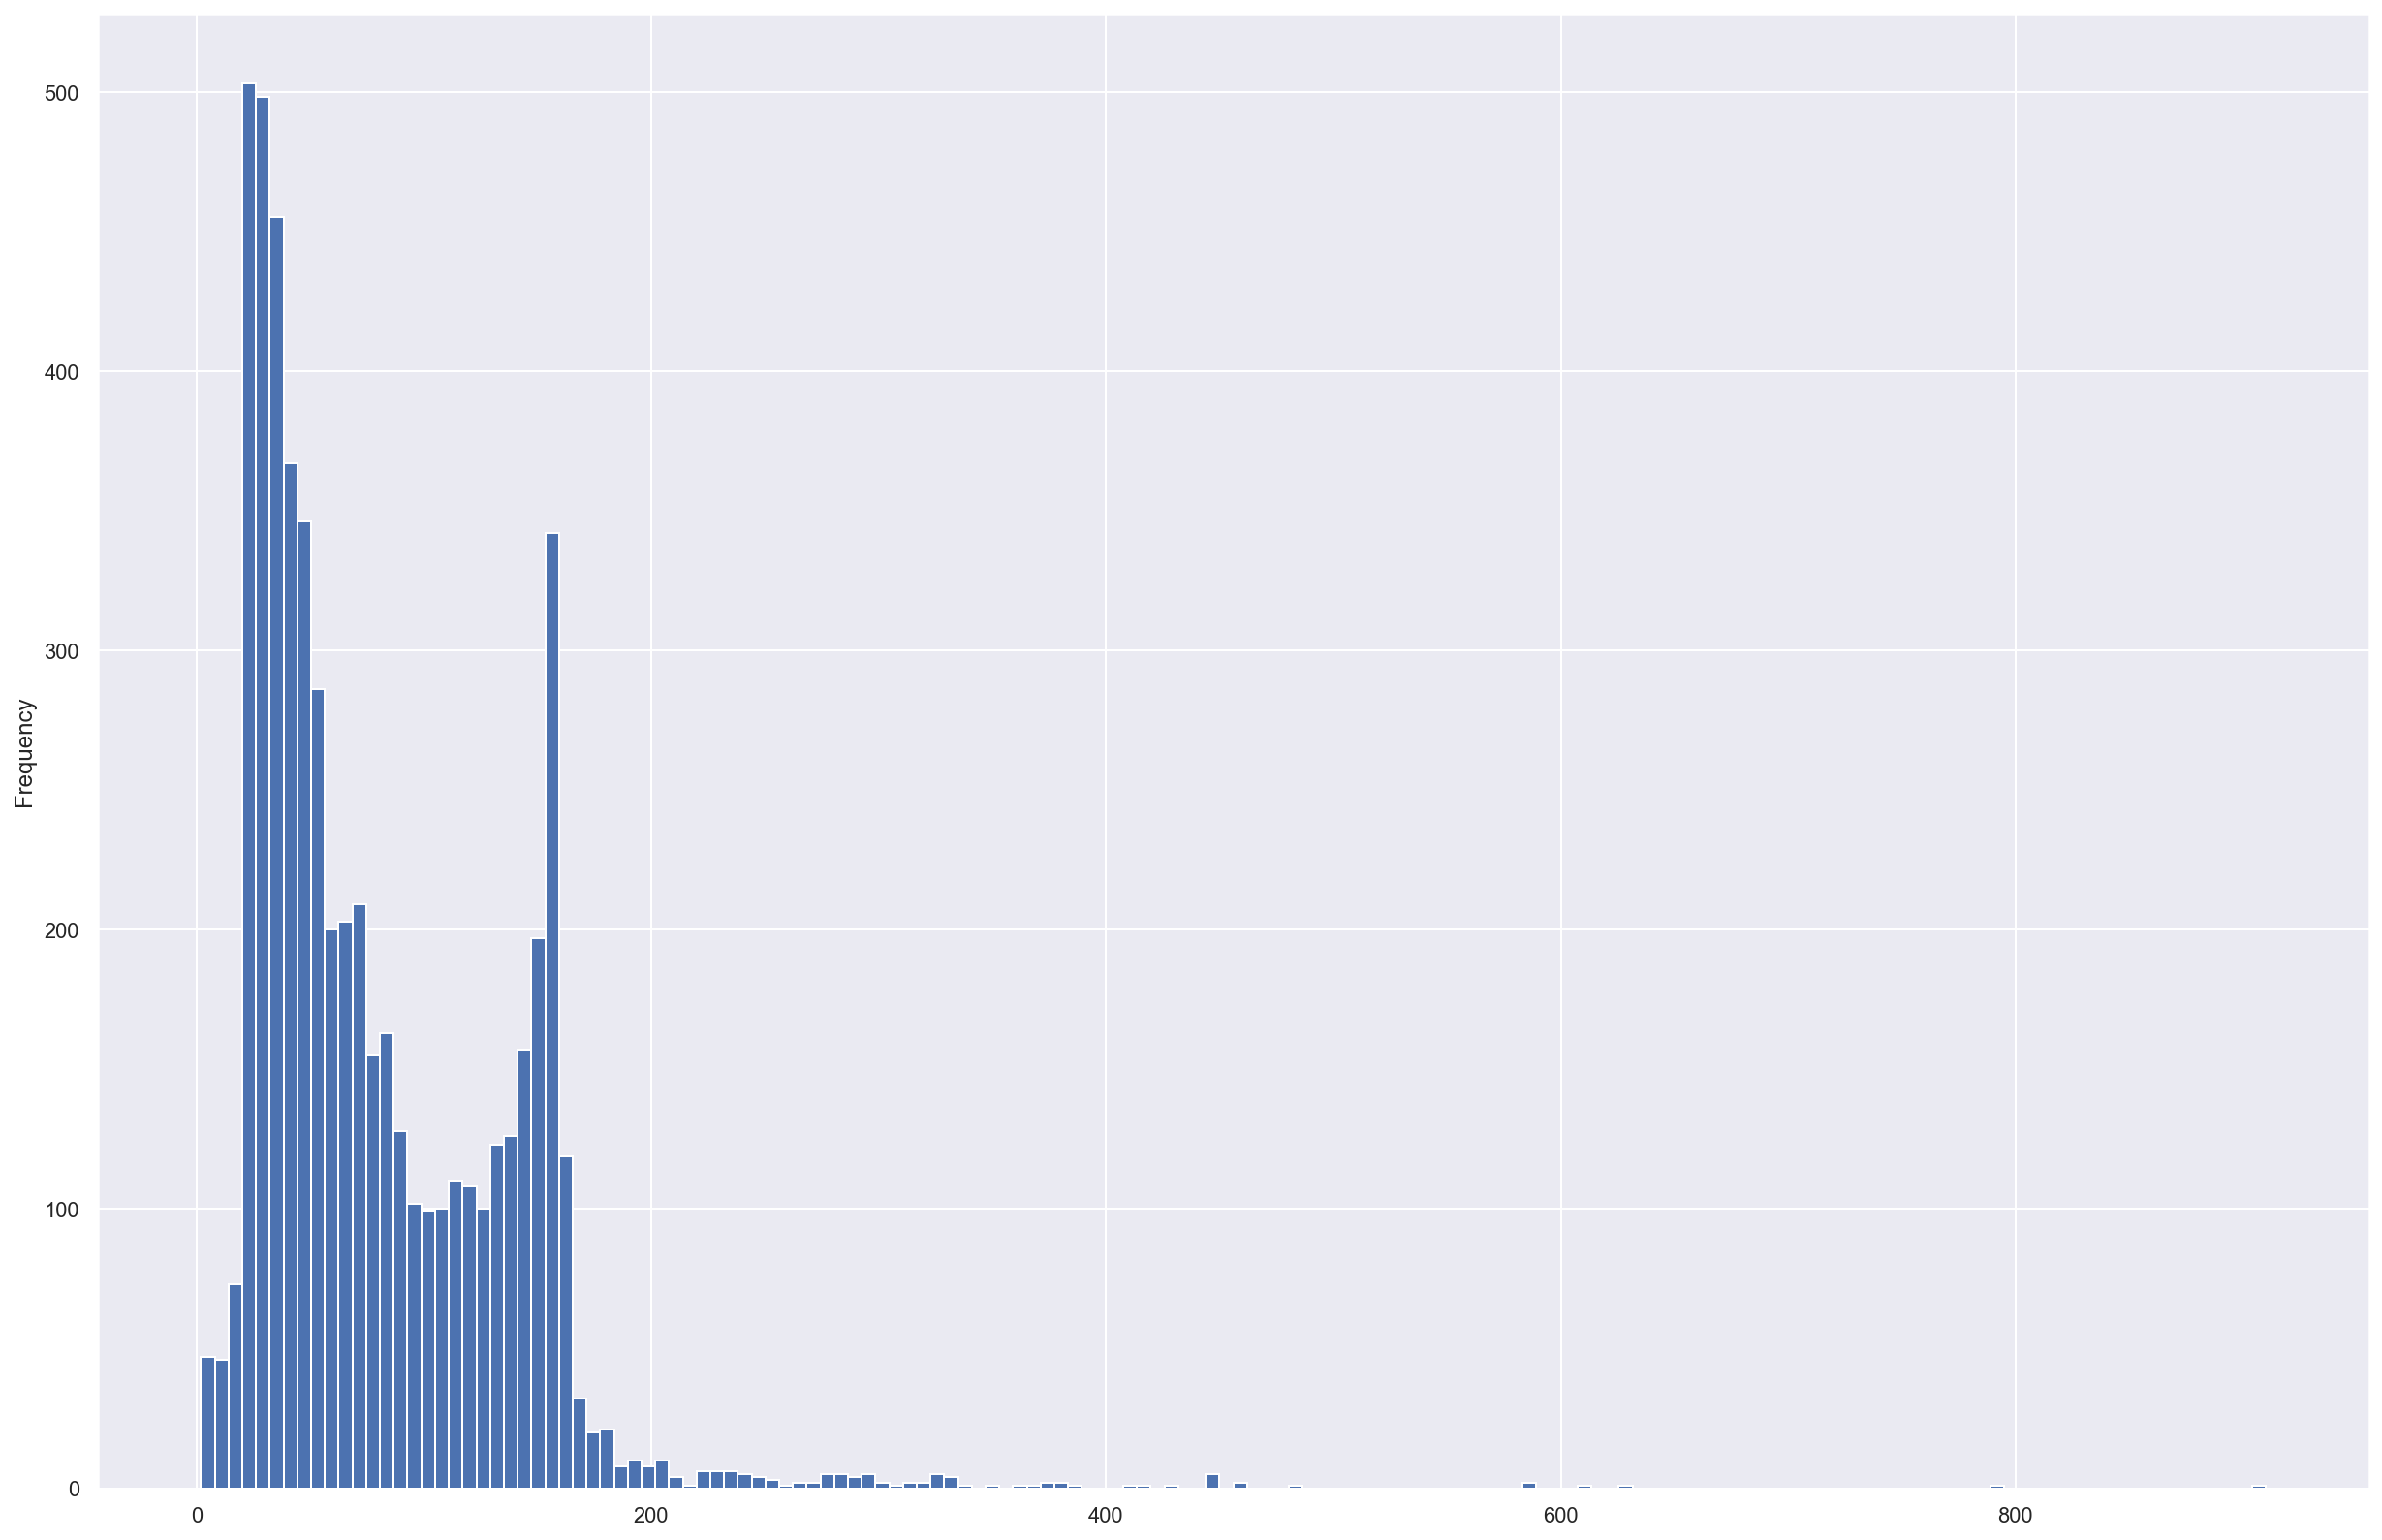

In [27]:
# Bimodal distribution
fig, ax = plt.subplots(figsize=(21, 14))
messages['length'].plot.hist(bins=150)
plt.show()

In [30]:
messages['length'].describe()['max']

910.0

In [33]:
messages[messages['length'] == messages['length'].describe()['max']]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

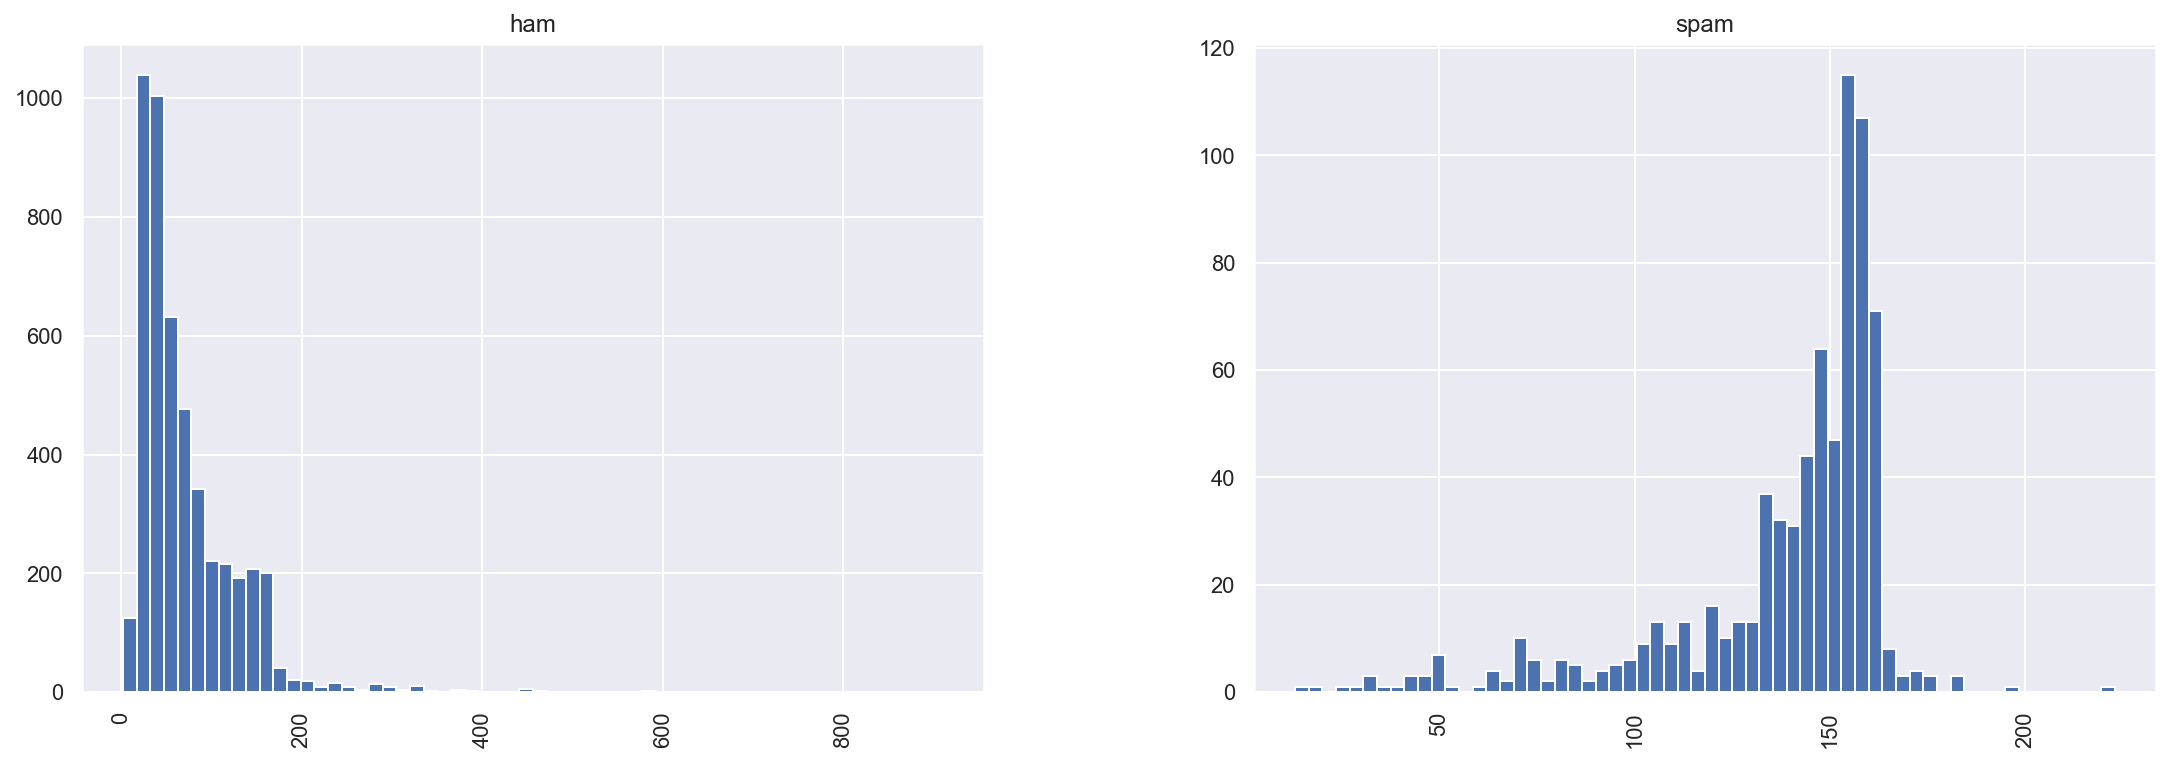

In [45]:
# Mean of spam length is higher than ham
messages.hist(column='length', by='label', bins=60, figsize=(18,6))
plt.show()

## Creating a bag-of-words

**Recall:**
**Bag of Words:** vector representation of a word counts of a document
**Cosine Similarity:**
$$sim(A,B) = cos(\theta) = \frac{A \cdot B}{||A||||B||}$$

Where A and B are the vectors of words:
<ul>
    <li> B = "Blue House" == (red,blue,house) == [0,1,1]</li>
    <li> A = "Red House" == (red,blue,house) == [1,0,1]</li>
</ul>

In [46]:
import string

In [47]:
mess = 'Sample message! Notice: it has punctuation.'

In [48]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
nopunc = [char for char in mess if char not in string.punctuation]
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [51]:
from nltk.corpus import stopwords

In [52]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [56]:
x = ['a', 'b', 'c', 'd']
display(''.join(x))
display('+++'.join(x))

'abcd'

'a+++b+++c+++d'

In [57]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [58]:
clean_mess = [word for word in nopunc.split() 
              if word.lower() not in stopwords.words('english')]

In [59]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [60]:
def text_process(mess):
    """
    1. remove punctuation
    2. remove stopwords
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess
             if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split()
           if word.lower() not in stopwords.words('english')]
    

In [61]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [62]:
# tokenize
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vectorization

Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [66]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7ffecb967950>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [67]:
print(len(bow_transformer.vocabulary_))

11425


In [70]:
mess4 = messages['message'][3]

In [72]:
print(mess4)

U dun say so early hor... U c already then say...


In [81]:
bow4 = bow_transformer.transform([mess4])
print(bow4, '\n\n', bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2 

 (1, 11425)


In [78]:
bow_transformer.get_feature_names()[4068]

'U'

In [82]:
messages_bow = bow_transformer.transform(messages['message'])

In [86]:
print("Shape of the Sparse Matrix: ", messages_bow.shape)
# Demonstrate the number of non-zero occurences
print("The number of Non-Zero Occurences: ", messages_bow.nnz)
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

Shape of the Sparse Matrix:  (5572, 11425)
The number of Non-Zero Occurences:  50548
sparsity: 0.07940295412668218


### Using TF-IDF
**Recall:**
**Term Frequency:** Importance of the term within a document
* TF(d,t) = number occurence of term $t$ in document $d$

**Inverse Document Frequency** Importance of the term in the corpus
$$IDF(t) = log\frac{D}{t}$$
Where
* **D = number of documents**
* **t= number of documents with the term**

**Mathematical Representation of TF-IDF**
$$W_{x,y} = tf_{x,y} \times log\frac{N}{df_{x}}$$
Where
* Term $x$ in document $y$
* $tf_{x,y} =$ frequency of $x$ in $y$
* $df_{x} = $ number of documents containing $x$
* $N =$ total number of documents

In [87]:
from sklearn.feature_extraction.text import TfidfTransformer

In [88]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [89]:
tfidf4 = tfidf_transformer.transform(bow4)

In [90]:
print(tfidf4)
# Interpret the numbers as the weight values for each of these words for the whole document

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [91]:
# Check the document frequency of a particular word
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [92]:
# Convert the entire bow corpus into a tfidf corpus at once
messages_tfidf = tfidf_transformer.transform(messages_bow)

### Train the model

In [93]:
from sklearn.naive_bayes import MultinomialNB

In [94]:
# Note, no split was completed
spam_detect_model = MultinomialNB().fit(X=messages_tfidf, y=messages['label'])

In [96]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [97]:
# Correctly predicted
messages['label'][3]

'ham'

In [98]:
all_pred = spam_detect_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [99]:
# Now, train properly
from sklearn.model_selection import train_test_split

In [102]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.3)

In [103]:
msg_train

2208    Usually the body takes care of it buy making s...
869     Hello. We need some posh birds and chaps to us...
1829                             May i call You later Pls
3898                 No. Thank you. You've been wonderful
4803        Reverse is cheating. That is not mathematics.
                              ...                        
1863    The last thing i ever wanted to do was hurt yo...
1716    Asking do u knw them or nt? May be ur frnds or...
2466                       S.i think he is waste for rr..
5482    URGENT We are trying to contact you Last weeke...
768                                Sorry, I'll call later
Name: message, Length: 3900, dtype: object

In [104]:
# Instead of doing all of the above to pre-process the text, we can use SKLearn's Pipeline
from sklearn.pipeline import Pipeline

In [105]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [106]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ffecb967950>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [107]:
predictions = pipeline.predict(msg_test)

In [108]:
# Check the results
from sklearn.metrics import classification_report

In [110]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1451
        spam       0.99      0.71      0.83       221

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [111]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])
pipeline.fit(msg_train, label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(label_test, predictions))

/Users/daiglechris/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1451
        spam       0.99      0.74      0.85       221

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672

